# Families distribution report

In this notebook the distribution of the malware family over time is analyzed.
It's shown that:
- Most of the data samples were firstly submitted near 2022, except two small peaks in 2018 and 2013
- Using a timespan of 1 year, 2018 is the first year in terms of number of discovered families. 
    As the timespan increases, the evidence of a higher change in new discovered families is clear in the second half of the collected data.
  $1 \le w \le \frac{max_{year} - min_{year}}{2}, w \in \mathbb{N}$

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Get the merged malware data
df = pd.read_csv("vt_reports/merge.csv")
df.head()

,sha256,first_submission_date,family
0,98f8e26e12b978102fa39c197f300ebe5fe535617737d5...,1630575593,tnega
1,7b2999ffadbc3b5b5c5e94145ca4e2f8de66ac1e3ddd52...,1629375559,quasar
2,e7569d494fe00be04ef6c9fcc5e54720c0df623b08e79d...,1362057319,pasta
3,1ed60c04f572b6acb9f64c31db55ef5c6b5465bd4da1eb...,1630624233,cjishu
4,4c4aaff20a57213d9a786e56ad22f1eaa94694a2f1042b...,1592186154,kingsoft


In [5]:
# Convert the date to datetime
df1 = df.copy()
df1['first_submission_date'] = df['first_submission_date'].apply(
    lambda t: pd.to_datetime(t, unit='s')
)

<Figure size 1500x1000 with 0 Axes>

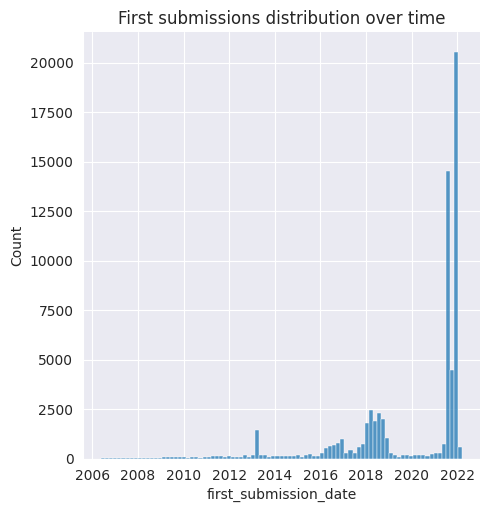

In [6]:
# Plot the distribution of first submissions over time
plt.figure(figsize=(15, 10))
dist_plot = sns.displot(df1, x='first_submission_date')
plt.title("First submissions distribution over time")
plt.show()

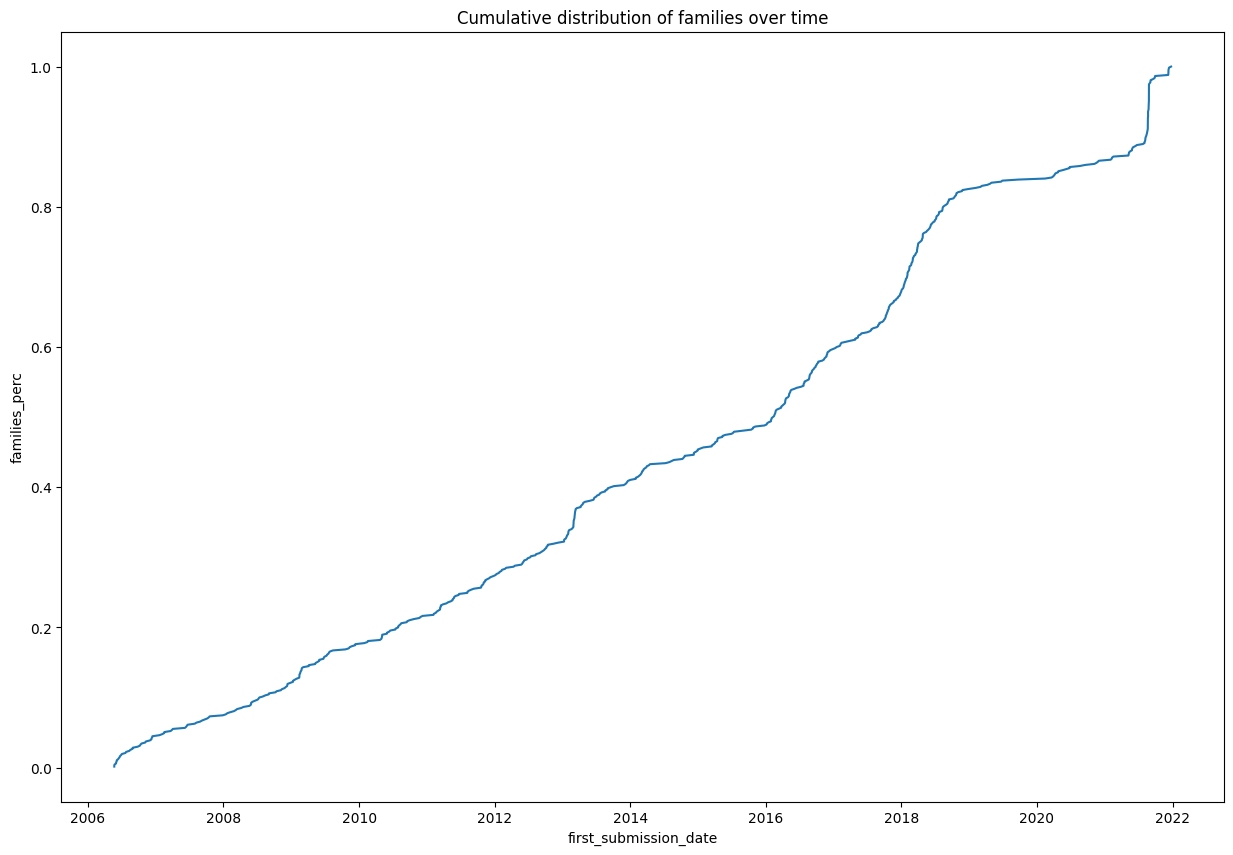

In [14]:
cumulative_df = pd.DataFrame(df1[["family", "first_submission_date"]], index=None)

# Group by the rows by the malware family, minimizing the first submission date
cumulative_df = cumulative_df.groupby(by=["family"]).min()

n = len(cumulative_df)
# For each timestamp, get the number of families previously discovered
cumulative_df['families_perc'] = cumulative_df['first_submission_date'].apply(
    lambda t: len(cumulative_df[cumulative_df['first_submission_date'] <= t]) / n
)

# Sort the submission date in ascending order
cumulative_df = cumulative_df.sort_values(by="first_submission_date")

# Plot the distribution of first submissions over time
plt.figure(figsize=(15, 10))
plt.title("Cumulative distribution of families over time")
sns.lineplot(cumulative_df, x="first_submission_date", y="families_perc")
plt.show()

In [15]:
# from sklearn.linear_model import LinearRegression
# import datetime as dt

# timestamp_to_datetime = lambda t: pd.to_datetime(t, unit='s')
# datetime_to_timestamp = lambda t: t.timestamp()

# min_year = pd.to_datetime(df["first_submission_date"].min(), unit='s').year
# max_year = pd.to_datetime(df["first_submission_date"].max(), unit='s').year

# print(f"min: {min_year}, max: {max_year}")


# #slope = np.zeros(max_year - min_year)

# def lin_reg_fit(df_split):
#     df_split.loc[:, "first_submission_date"] = df_split["first_submission_date"].apply(
#         lambda t: datetime_to_timestamp(t)
#     )
#     X, y = df_split[["first_submission_date"]].to_numpy(), df_split["families_perc"].to_numpy()
#     return LinearRegression().fit(X, y), X, y


# def plot_reg_pair(reg1_data, reg2_data):
#     reg1, X1, _ = reg1_data
#     reg2, X2, _ = reg2_data

#     X1_1 = timestamp_to_datetime(X1.ravel())
#     X2_1 = timestamp_to_datetime(X2.ravel())

#     df1 = pd.DataFrame({"first_submission_date": X1_1, "families_perc": reg1.predict(X1)})
#     df2 = pd.DataFrame({"first_submission_date": X2_1, "families_perc": reg2.predict(X2)})

#     # Plot the data points and the regression line
#     # plt.plot(pd.to_datetime(X1, unit='s'), reg1.predict(X1), color='red', label='Regression line of training set')
#     # plt.plot(pd.to_datetime(X2, unit='s'), reg2.predict(X2), color='blue', label='Regression line of test set')
#     # plt.xlabel('X')
#     # plt.ylabel('Y')
#     # plt.legend()
#     # plt.show()

#     plt.figure(figsize=(15, 10))
#     plt.title("Training/Test best split based on regression models")
#     sns.lineplot(df1, x="first_submission_date", y="families_perc")
#     sns.lineplot(df2, x="first_submission_date", y="families_perc")
#     plt.show()


# split = np.array_split(cumulative_df, (max_year - min_year) / 2)

# n = len(split) - 1
# slopes_diff = np.zeros(n)
# first_regressions_data = []
# sec_regressions_data = []

# for k in range(len(split) - 1):
#     df_first = pd.concat(split[:k + 1])
#     df_sec = pd.concat(split[k + 1:])

#     first_regressions_data.append(lin_reg_fit(df_first))
#     sec_regressions_data.append(lin_reg_fit(df_sec))

#     #plot_reg_pair(first_regressions_data[k], sec_regressions_data[k])
#     print(sec_regressions_data[k][0].coef_)
#     slopes_diff[k] = sec_regressions_data[k][0].coef_[0] - first_regressions_data[k][0].coef_[0]

# index_max = np.argmax(slopes_diff)

# plot_reg_pair(first_regressions_data[index_max], sec_regressions_data[index_max])

In [16]:
timestamp_to_datetime = lambda t: pd.to_datetime(t, unit='s')
datetime_to_timestamp = lambda t: t.timestamp()

def lin_reg_fit(df_split):
    df_split["first_submission_date"] = df_split["first_submission_date"].apply(
        lambda t: datetime_to_timestamp(t)
    );
    X, y = df_split[["first_submission_date"]].to_numpy(), df_split["families_perc"].to_numpy()
    return LinearRegression().fit(X, y), X, y

def plot_reg_pair(reg_data, j):
    fig, ax = plt.subplots()
    plt.title("Window-based linear regression")

    for i in range(len(reg_data)):
        reg, X, _ = reg_data[i]
        X1 = timestamp_to_datetime(X.ravel())
        df1 = pd.DataFrame({"first_submission_date": X1, "families_perc": reg.predict(X)})
        sns.scatterplot(cumulative_df, x="first_submission_date", y="families_perc")
        sns.lineplot(df1, x="first_submission_date", y="families_perc", linewidth=3 if i == j else 1, ax=ax)
    plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

min_datetime = timestamp_to_datetime(df["first_submission_date"].min())
max_datetime = timestamp_to_datetime(df["first_submission_date"].max())

total_duration = max_datetime - min_datetime

def window_linear_regression(n_windows = 2):
    window_size = total_duration / n_windows
    
    windows = [i * window_size for i in range(n_windows + 1)]
    splits = [cumulative_df[
                  (cumulative_df["first_submission_date"] - min_datetime >= windows[i - 1]) & 
                  (cumulative_df["first_submission_date"] - min_datetime < windows[i])] 
              for i in range(1, len(windows))]
    
    regressions_data = []
    slopes = []
    for split in splits:
        regression_data = lin_reg_fit(split)
        regressions_data.append(regression_data)
        slopes.append(regression_data[0].coef_[0])
    
    index_max = np.argmax(slopes)
    plot_reg_pair(regressions_data, index_max)

In [18]:
%matplotlib inline
from ipywidgets import *

n_windows = max_datetime.year - min_datetime.year
interact(window_linear_regression, w=(2, n_windows, 1))

interactive(children=(IntSlider(value=2, description='n_windows', max=6, min=-2), Output()), _dom_classes=('wi…

<function __main__.window_linear_regression(n_windows=2)>